# Required python packages

In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle

# User defined functions

In [347]:
def decorate_barplot(object, border_color, border_width):
    for bar in object.patches:
        bar.set_edgecolor(border_color)
        bar.set_linewidth(border_width)

# Data import from csv file

In [348]:
data = pd.read_csv('tiktok_dataset.csv')

# Data overview

In [349]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


$\textbf{Inference : }$ The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


$\textbf{Inference : }$ There are 193282 number of total video records in the dataset. There are 5 columns with float type data, 3 columns with integer type data and remaining 4 columns are of type object. There are some missing values in certain rows.

In [351]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

$\textbf{Inference : }$ Over 200 null values were found in 7 different columns.

In [352]:
data.duplicated().sum()

0

$\textbf{Inference : }$ There are no duplicate entries in the dataset

In [353]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


$\textbf{Inference : }$ Descriptive statistics of the given data for numerics only. Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

In [354]:
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


$\textbf{Inference : }$ The above descriptive statistics also include information about the non-numeric columns. The "claim_status" column has two types of values, they are "claim" and "opinion", out of them, "claim" type has the most frequency of occurance. We may need to check the class-balance later.

In [355]:
data = data.dropna(axis = 0).reset_index(drop=True)

$\textbf{Inference : }$ NaN values are dropped

In [356]:
data.to_csv('data_v1.csv', index=False)

# Understanding the data

In [357]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

$\textbf{Inference : }$ The two classes "claim" and "opinion" are well balanced in number, so a good machine learning classification model can be constructed.

Mean View count for claim-type: 501029.4527477102
Median View count for claim-type: 501555.0


<Axes: title={'center': 'Outier detection of claim-type video counts'}, xlabel='Video View count : claim-type'>

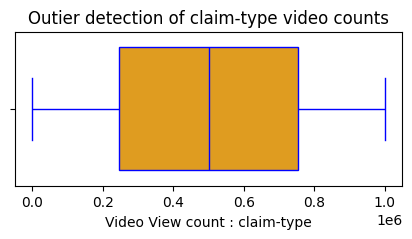

In [358]:
# Mean video view count for "claim" type videos
print("Mean View count for claim-type: " + str(data[data['claim_status'] == 'claim']['video_view_count'].mean()))

# Median video view count for "claim" type videos
print("Median View count for claim-type: " + str(data[data['claim_status'] == 'claim']['video_view_count'].median()))

fig = plt.figure(figsize=(5,2))
plt.xlabel("Video View count : claim-type")
plt.title("Outier detection of claim-type video counts")
sns.boxplot(x=data[data['claim_status']=='claim']['video_view_count'], color="orange", linecolor="blue")

$\textbf{Inference : }$ For "claim" type videos, the mean and the median of view counts are almost same, so the possibility of having outliers in this class is less. This is further verified using boxplot for "claim" type video view counts

Mean View count for opinion-type: 4956.43224989447
Median View count for opinion-type: 4953.0


<Axes: title={'center': 'Outier detection of opinion-type video counts'}, xlabel='Video View count : opinion-type'>

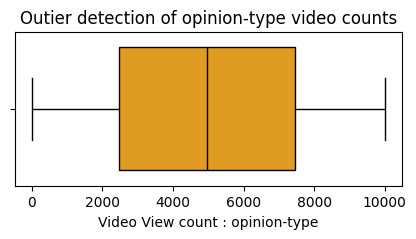

In [359]:
# Mean video view count for "opinion" type videos
print("Mean View count for opinion-type: " + str(data[data['claim_status'] == 'opinion']['video_view_count'].mean()))

# Median video view count for "opinion" type videos
print("Median View count for opinion-type: " + str(data[data['claim_status'] == 'opinion']['video_view_count'].median()))

fig = plt.figure(figsize=(5,2))
plt.xlabel("Video View count : opinion-type")
plt.title("Outier detection of opinion-type video counts")
sns.boxplot(x=data[data['claim_status']=='opinion']['video_view_count'], color="orange", linecolor="black")

$\textbf{Inference : }$ For "opinion" type videos, the mean and the median of view counts are almost same, so the possibility of having outliers in this class is less. This is further verified using boxplot for "opinion" type video view counts

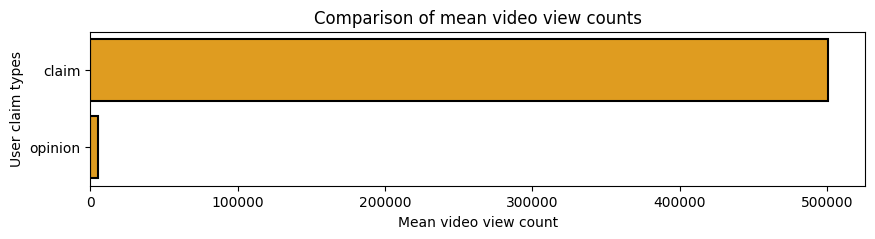

In [360]:
view_count_means = [data[data['claim_status'] == 'claim']['video_view_count'].mean(), data[data['claim_status'] == 'opinion']['video_view_count'].mean()]
view_count_labels = ['claim', 'opinion']
fig = plt.figure(figsize=(10,2))
plt.xlabel("Mean video view count");
plt.ylabel("User claim types");
plt.title("Comparison of mean video view counts");
bar_plot = sns.barplot(y=view_count_labels, x=view_count_means, color="orange");
decorate_barplot(bar_plot, "black", 1.5)

$\textbf{Inference : }$ The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [361]:
data['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

$\textbf{Inference : }$ There are three types of "author_ban_status"

In [362]:
data.groupby(['claim_status', 'author_ban_status']).count()[["#"]]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

$\textbf{Inference : }$ There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that claim videos are more strictly policed than opinion videos and authors must comply with a stricter set of rules if they post a claim than if they post an opinion

In [363]:
data.groupby(['author_ban_status']).agg(
    {
        'video_view_count' : ['mean', 'median'],
        'video_like_count' : ['mean', 'median'],
        'video_share_count' : ['mean', 'median'],
        'video_download_count' : ['mean', 'median'],
        'video_comment_count' : ['mean', 'median']
    }
)

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count          video_download_count         \
                               mean   median                 mean median   
author_ban_status                                                          
active                 14111.466164    437.0           882.276344   28.0   
banned                 29998.942508  14468.0          1886.296024  892.0   
under review           25774.696999   9444.0          1631.734753  610.5   

                  video_comment_count         
                                 mean median  
author_ban_status                             
active                     295.134499    5.0  
banned                     614.956575  209.0  
under review               542.480639  136.5

 $\textbf{Inference : }$ Banned authors have a median share count that's 33 times the median share count of active authors. Banned authors and those under review get far more views, likes, and shares than active authors. In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

# Some feature extractions

In [364]:
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']
data['downloads_per_view'] = data['video_download_count'] / data['video_view_count']

In [365]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,downloads_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,0.000003
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,0.008241
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,0.000923
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,0.002821
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,0.009739


In [366]:
data.groupby(['claim_status', 'author_ban_status']).agg(
        {
            'likes_per_view': ['count', 'mean', 'median'],
            'comments_per_view': ['count', 'mean', 'median'],
            'shares_per_view': ['count', 'mean', 'median'],
            'downloads_per_view' : ['count', 'mean', 'median']
        }
     )

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      \
                                         count      mean    median   
claim_status author_ban_status                                       
claim        active                       6566  0.065456  0.049279   
             banned                       1439  0.067893  0.051606   
             under review                 1603  0.065733  0.049967   
opinion      active                       8817  0.043729  0.032405   
             banned                        196  0.040531  0.030728   
             under review                  463  0.044472  0.035027   

                               downloads_per_view                      
                                            count      mean    median  
claim_status author_ban_status                                         
claim        active                          6566  0.004133  0.003083  
             banned                          1439  0.004240  0.003142  
             under review                    1603  0.004112  0.003091  
opinion      active                          8817  0.002712  0.001977  
             banned                           196  0.002580  0.001804  
             under review                     463  0.002777  0.002053

 $\textbf{Inference : }$ Claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

In [367]:
data.to_csv('data_v1.csv', index=False)

$\textbf{Inference : }$ Data with additional columns are saved in anew file named "data_v1.csv"

# Some more EDA

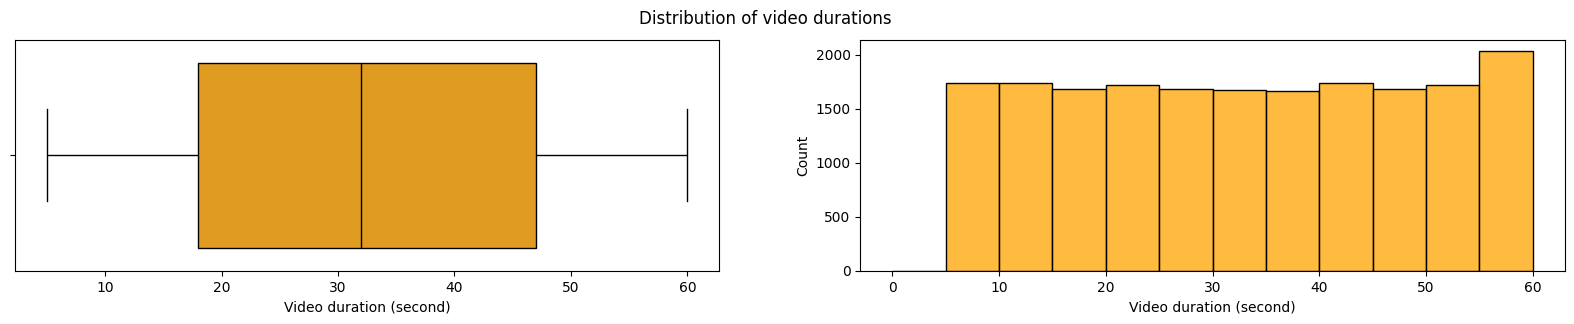

In [368]:
fig = plt.figure(figsize=(20,3))

plt.suptitle("Distribution of video durations")

plt.subplot(1,2,1)
plt.xlabel("Video duration (second)")
sns.boxplot(x=data['video_duration_sec'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(1,2,2)
plt.xlabel("Video duration (second)")
sns.histplot(x=data['video_duration_sec'], bins=range(0,61,5), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

$\textbf{Inference : }$ All videos are 5-60 seconds in length, and the distribution is uniform.

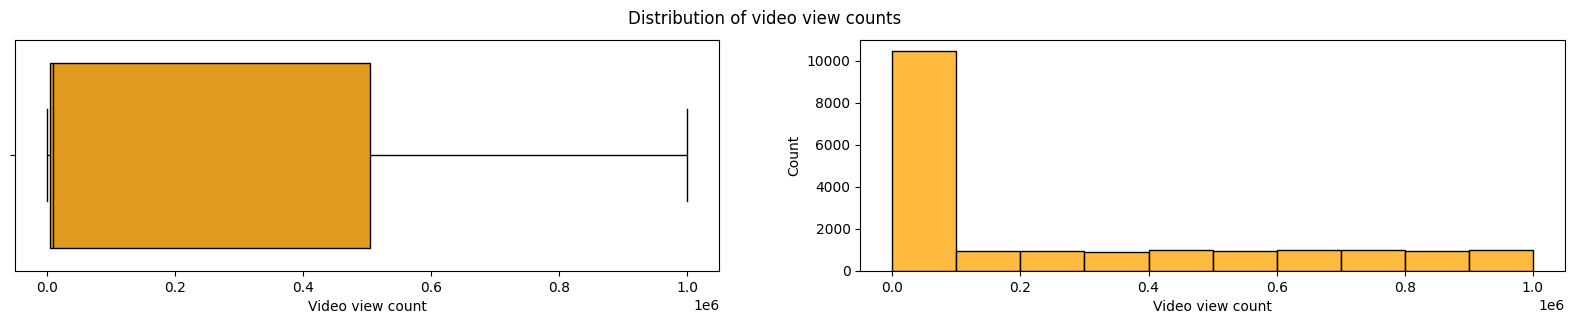

In [369]:
fig = plt.figure(figsize=(20,3))

plt.suptitle("Distribution of video view counts")

plt.subplot(1,2,1)
plt.xlabel("Video view count")
sns.boxplot(x=data['video_view_count'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(1,2,2)
plt.xlabel("Video view count")
sns.histplot(x=data['video_view_count'], bins=range(0,(10**6+1),10**5), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

In [370]:
# fig = plt.figure(figsize=(7,5))
# plt.title("Distribution of video view counts", fontweight = 'bold', fontsize=16)
# plt.xlabel("Video view count", fontweight = 'bold', fontsize=16)
# plt.ylabel("Count", fontweight = 'bold', fontsize=16)
# sns.histplot(x=data['video_view_count'], bins=range(0,(10**6+1),10**5), color="orange")
# plt.xticks(fontweight='bold', fontsize=12);
# plt.yticks(fontweight='bold', fontsize=12);
# plt.savefig("hist1.png", dpi = 500)

$\textbf{Inference : }$ This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

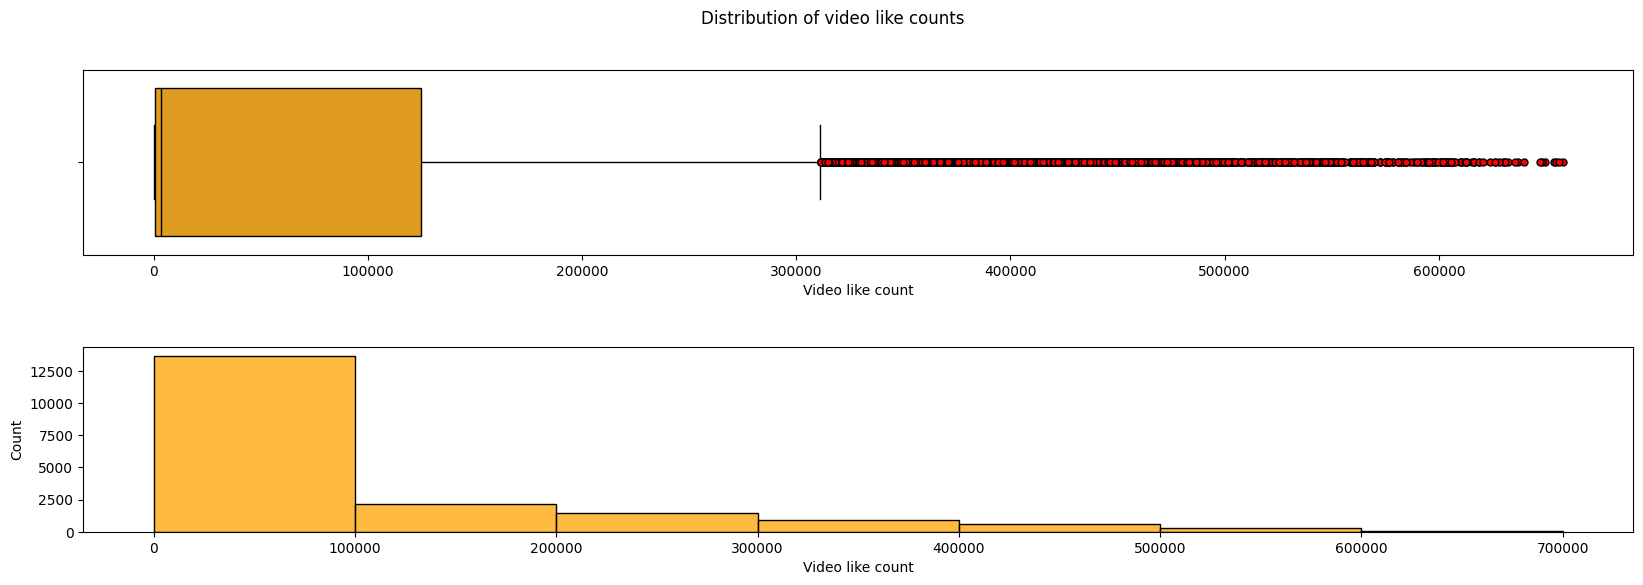

In [371]:
fig = plt.figure(figsize=(20,6))

plt.suptitle("Distribution of video like counts")

plt.subplot(2,1,1)
plt.xlabel("Video like count")
sns.boxplot(x=data['video_like_count'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(2,1,2)
plt.xlabel("Video like count")
sns.histplot(x=data['video_like_count'], bins=range(0,(7*10**5+1),10**5), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

In [372]:
# fig = plt.figure(figsize=(7,5))
# plt.title("Distribution of video like counts", fontweight = 'bold', fontsize=16)
# plt.xlabel("Video like count", fontweight = 'bold', fontsize=16)
# plt.ylabel("Count", fontweight = 'bold', fontsize=16)
# sns.histplot(x=data['video_like_count'], bins=range(0,(7*10**5+1),2*10**5), color="orange")
# plt.xticks(fontweight='bold', fontsize=12);
# plt.yticks(fontweight='bold', fontsize=12);
# plt.savefig("hist2.png", dpi = 500)

$\textbf{Inference : }$ Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there are more outliers

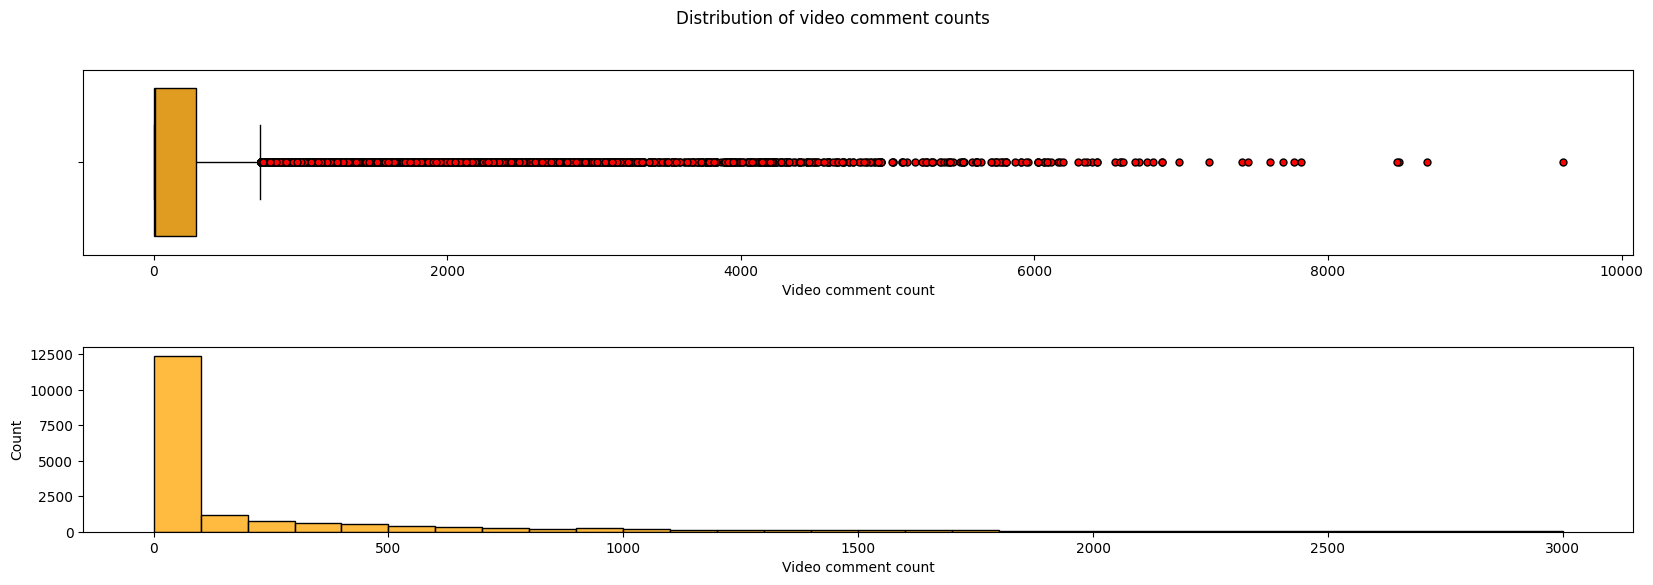

In [373]:
fig = plt.figure(figsize=(20,6))

plt.suptitle("Distribution of video comment counts")

plt.subplot(2,1,1)
plt.xlabel("Video comment count")
sns.boxplot(x=data['video_comment_count'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(2,1,2)
plt.xlabel("Video comment count")
sns.histplot(x=data['video_comment_count'], bins=range(0,(3001),100), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

In [374]:
# fig = plt.figure(figsize=(7,5))
# plt.title("Distribution of video comment counts", fontweight = 'bold', fontsize=16)
# plt.xlabel("Video comment count", fontweight = 'bold', fontsize=16)
# plt.ylabel("Count", fontweight = 'bold', fontsize=16)
# sns.histplot(x=data['video_comment_count'], bins=range(0,(3001),100), color="orange")
# plt.xticks(fontweight='bold', fontsize=12);
# plt.yticks(fontweight='bold', fontsize=12);
# plt.savefig("hist3.png", dpi = 500)

$\textbf{Inference : }$ Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

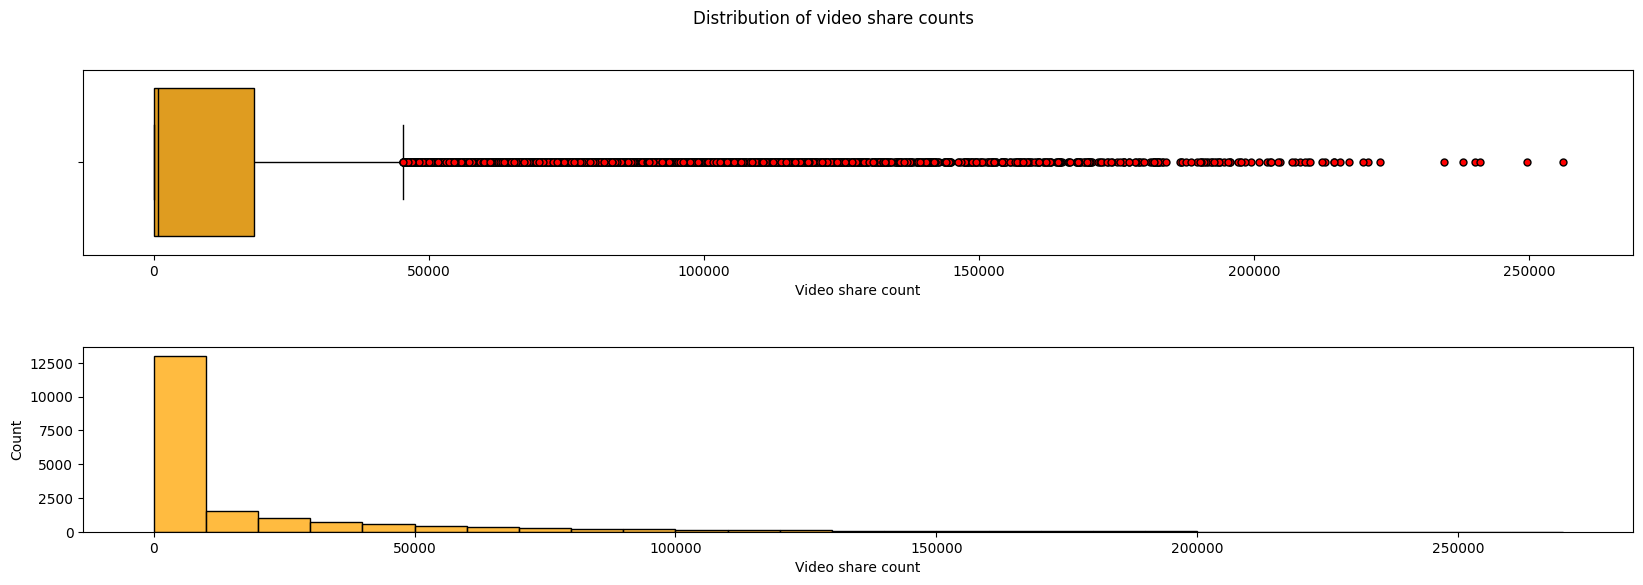

In [375]:
fig = plt.figure(figsize=(20,6))

plt.suptitle("Distribution of video share counts")

plt.subplot(2,1,1)
plt.xlabel("Video share count")
sns.boxplot(x=data['video_share_count'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(2,1,2)
plt.xlabel("Video share count")
sns.histplot(x=data['video_share_count'], bins=range(0,(270001),10000), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

$\textbf{Inference : }$ The majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

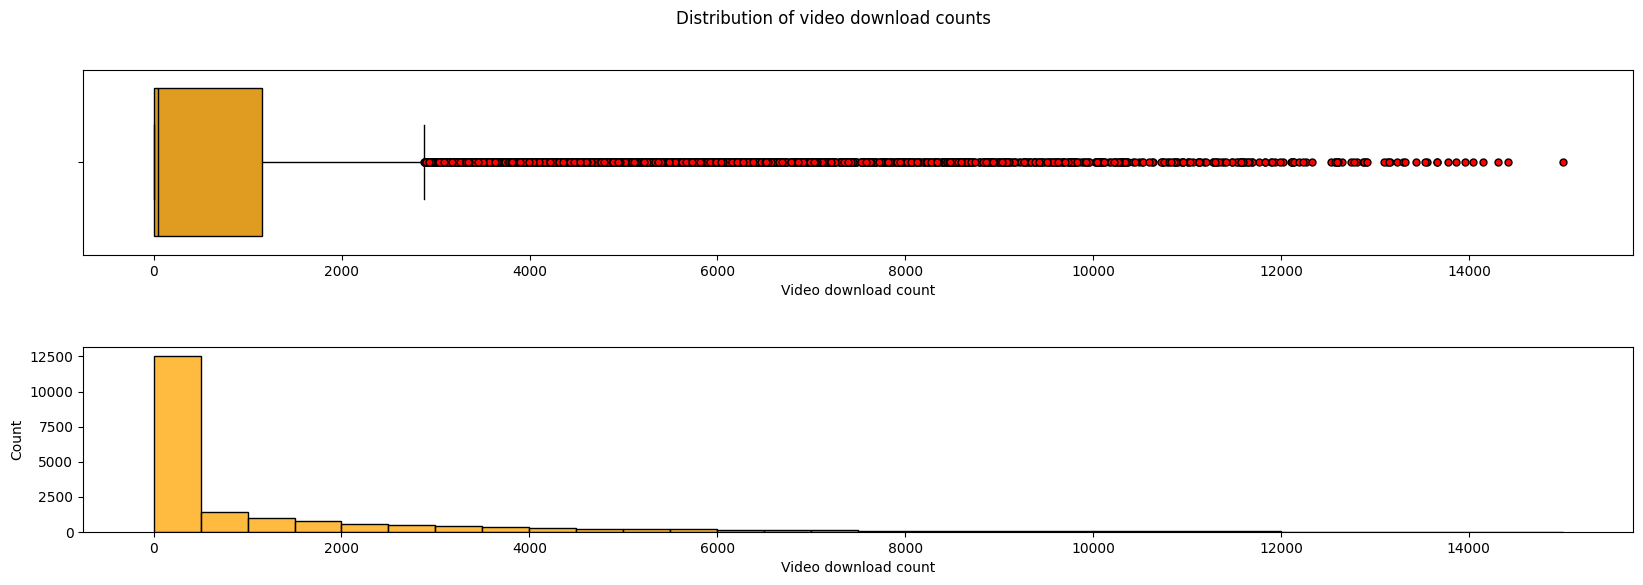

In [376]:
fig = plt.figure(figsize=(20,6))

plt.suptitle("Distribution of video download counts")

plt.subplot(2,1,1)
plt.xlabel("Video download count")
sns.boxplot(x=data['video_download_count'], color="orange", linecolor="black", flierprops={'markerfacecolor':'r', 'markersize':5})

plt.subplot(2,1,2)
plt.xlabel("Video download count")
sns.histplot(x=data['video_download_count'], bins=range(0,(15001),500), color="orange")

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

$\textbf{Inference : }$ The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

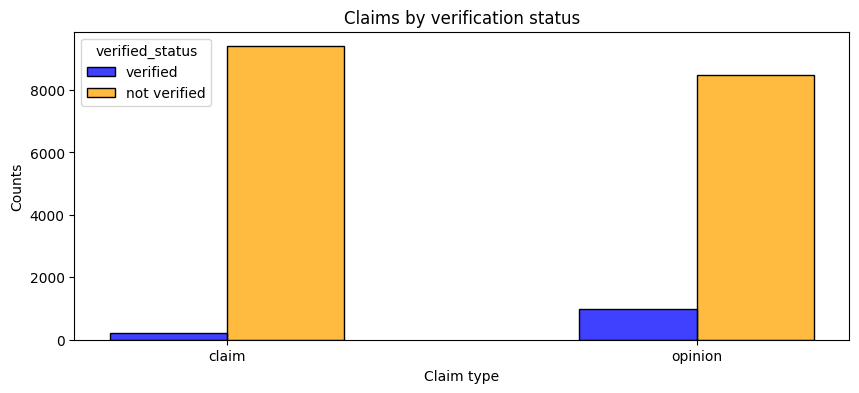

In [377]:
fig = plt.figure(figsize=(10,4))
plt.xlabel("Claim type");
plt.ylabel("Counts");
plt.title("Claims by verification status");
sns.histplot(data=data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.5,
              palette={'not verified':'orange', 'verified':'blue'}, hue_order=['verified', 'not verified']);

$\textbf{Inference : }$ There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

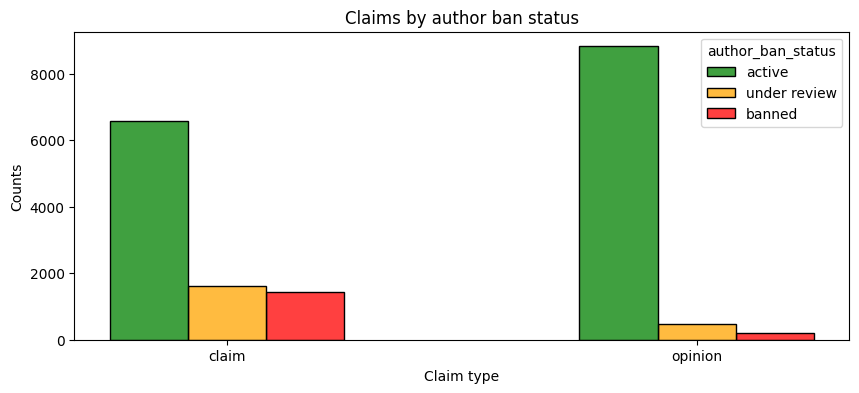

In [378]:
fig = plt.figure(figsize=(10,4))
plt.xlabel("Claim type");
plt.ylabel("Counts");
plt.title("Claims by author ban status");
sns.histplot(data=data, x='claim_status', hue='author_ban_status', multiple='dodge', shrink=0.5, palette={'active':'green', 'under review':'orange', 'banned':'red'},
             hue_order=['active', 'under review', 'banned']);

$\textbf{Inference : }$ For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

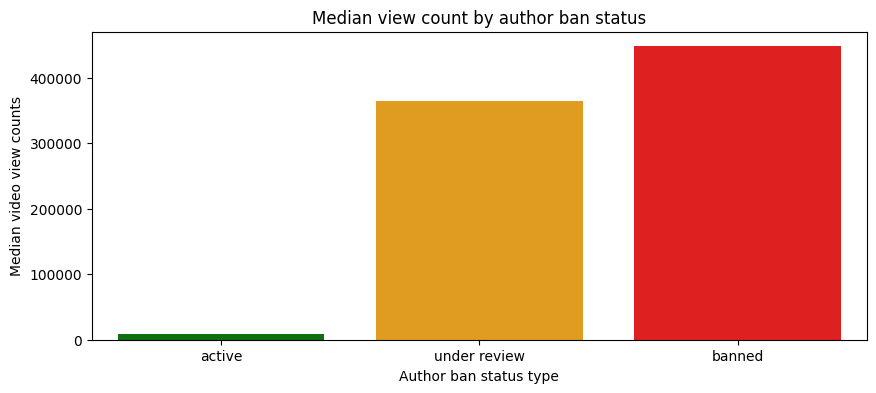

In [379]:
ban_status_counts = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(10,4))
plt.xlabel("Author ban status type");
plt.ylabel("Median video view counts");
plt.title("Median view count by author ban status")
sns.barplot(data=ban_status_counts, x='author_ban_status', y='video_view_count', order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'}, hue="author_ban_status", legend=False);

$\textbf{Inference : }$ The median view counts for non-active authors are many times greater than the median view count for active authors. Since the non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

In [380]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

$\textbf{Inference : }$ Claim type videos have more views than opinion type videos

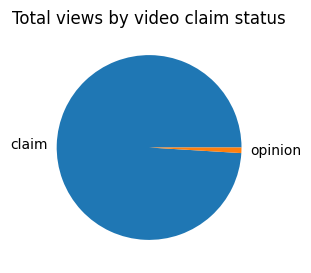

In [381]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

$\textbf{Inference : }$ The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

# Outliers

#### Definition of outlier in this project: any values that are in range q3+1.5*iqr are considered as outliers

In [382]:
column_names = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
for col_name in column_names:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1
    outlier_threshold = q3 + (1.5*iqr)
    outlier_counts = (data[col_name] > outlier_threshold).sum()
    print("Number of outliers in the column " + col_name + " :" + str(outlier_counts))

Number of outliers in the column video_view_count :0
Number of outliers in the column video_like_count :1726
Number of outliers in the column video_share_count :2508
Number of outliers in the column video_download_count :2450
Number of outliers in the column video_comment_count :2789


$\textbf{Inference : }$ There are significant number of outliers in each of the above columns

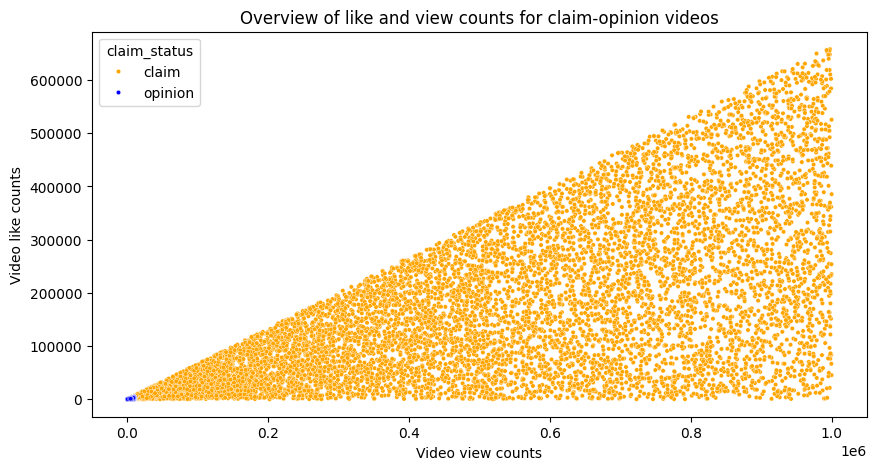

In [383]:
fig = plt.figure(figsize=(10,5))
plt.title("Overview of like and view counts for claim-opinion videos")
plt.xlabel("Video view counts")
plt.ylabel("Video like counts")
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"], hue=data["claim_status"], s=10, palette={'opinion' : 'blue', 'claim' : 'orange'});

$\textbf{Inference : }$ There are significant number of views and likes for claim types videos than opinion videos

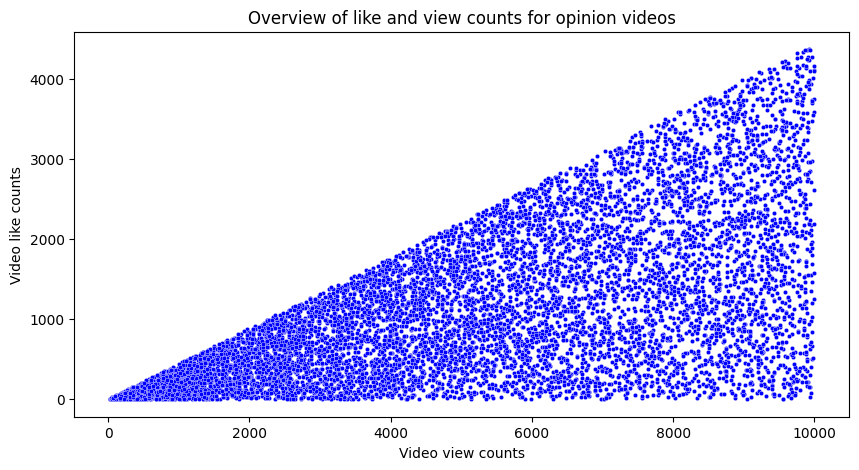

In [384]:
fig = plt.figure(figsize=(10,5))
plt.title("Overview of like and view counts for opinion videos")
plt.xlabel("Video view counts")
plt.ylabel("Video like counts")
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"], s=10, color = 'blue');

$\textbf{Inference : }$ More views grab more like in opinion types videos

# Hypothesis tests

In [385]:
data.groupby(['verified_status'])['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

$\textbf{Inference : }$ Mean of video view counts from not-verified authors are more than verified-authors.

#### Question: Is this difference in mean statistically significant? or just happend by chance?


#### Null hypothesis: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
#### Alternative hypothesis: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).


# Need: two samples t-test with significance level 5%

In [386]:
data_not_verified = data[data['verified_status']=='not verified']['video_view_count']
data_verified = data[data['verified_status']=='verified']['video_view_count']
stats.ttest_ind(a=data_not_verified, b=data_verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

$\textbf{Inference : }$ Two samples t-test shows that the p value is extremely small < 0.05, so we can reject the Null hypothesis and conclude that indeed the not-verified authors grab more views as compared to verified authors and the distinction is statistically significant. This suggests there might be fundamental behavioral differences between these two groups of accounts.

#### Notes to stakeholders: It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

# Some regression analysis

#### Earlier analysis showed that, if a user is verified, they are much more likely to post opinions. How to predict verified status to help understand how video characteristics relate to verified users? 
#### A logistic regression with "verified_status" as the target variable will help

In [387]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [388]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
likes_per_view              float64
comments_per_view           float64
shares_per_view             float64
downloads_per_view          float64
dtype: object

$\textbf{Inference : }$ The object type data need to be converted to numerics before fitting to the model

# Handle outliers

#### The regression models are very sensitive to outliers since they can bias the model output. So, we need to handle them before fitting the model. In the present dataset, the features "video_view_count", "video_like_count" and "video_comment_count" have outliers only in the upper spectrum of the data, as infered from their respective boxplots

#### Define outliers: Any data point that lies 1.5 timed IQR above and below of 75 and 25 percentiles are considered as outliers

#### How to handle?
Since the outliers count in these features are on an average more than 1000, we can not ignore them. However, to handle them, we can set the outier values to the maximum outlier threshold

In [389]:
percentile25 = data['video_like_count'].quantile(0.25)
percentile75 = data['video_like_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data.loc[data['video_view_count']>upper_threshold, 'video_like_count'] = upper_threshold

In [390]:
percentile25 = data['video_comment_count'].quantile(0.25)
percentile75 = data['video_comment_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data.loc[data['video_comment_count']>upper_threshold, 'video_comment_count'] = upper_threshold

In [391]:
percentile25 = data['video_view_count'].quantile(0.25)
percentile75 = data['video_view_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data.loc[data['video_view_count']>upper_threshold, 'video_view_count'] = upper_threshold

In [392]:
percentile25 = data['video_share_count'].quantile(0.25)
percentile75 = data['video_share_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data.loc[data['video_share_count']>upper_threshold, 'video_share_count'] = upper_threshold

In [393]:
percentile25 = data['video_download_count'].quantile(0.25)
percentile75 = data['video_download_count'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data.loc[data['video_download_count']>upper_threshold, 'video_download_count'] = upper_threshold

In [394]:
percentile25 = data['video_duration_sec'].quantile(0.25)
percentile75 = data['video_duration_sec'].quantile(0.75)
iqr = percentile75 - percentile25
upper_threshold = percentile75 + (1.5*iqr)
data['video_duration_sec'] = data['video_duration_sec'].astype(float)
data.loc[data['video_duration_sec']>upper_threshold, 'video_duration_sec'] = upper_threshold

# Class balance 

#### Since the target feature is "verified_status", we need to check the class balance for this feature

In [395]:
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

$\textbf{Inference : }$ There is a significant imbalance in the above two classes. Since the dataset is small enought, upsampling the minority class will be benificial

In [396]:
majority_class = data[data['verified_status']=='not verified']
minority_class = data[data['verified_status']=='verified']
minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=0)
data_upsampled = pd.concat([majority_class, minority_class_upsampled]).reset_index(drop=True)

In [397]:
data_upsampled['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

$\textbf{Inference : }$ These two above classes are now balanced

In [398]:
data_upsampled.duplicated().sum()

16684

$\textbf{Inference : }$ There will be duplicate entries due to upsampling the minority class

In [399]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


$\textbf{Inference : }$ The average video transcription text lengths are almost same for verified and not verified authors videos

In [400]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func=lambda text: len(text))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,downloads_per_view,text_length
0,1,claim,7017666017,59.0,someone shared with me that drone deliveries a...,not verified,under review,343296.0,311333.875,241.0,1.0,0.0,0.056584,0.000000,0.000702,0.000003,97
1,2,claim,4014381136,32.0,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,0.008241,107
2,3,claim,9859838091,31.0,someone shared with me that american industria...,not verified,active,902185.0,311333.875,2858.0,833.0,329.0,0.108282,0.000365,0.003168,0.000923,137
3,4,claim,1866847991,25.0,someone shared with me that the metro of st. p...,not verified,active,437506.0,311333.875,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,0.002821,131
4,5,claim,7105231098,19.0,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,0.622910,0.002706,0.073175,0.009739,128


$\textbf{Inference : }$ An additional column "text_length" is addded which can be used as a predictor variable

<Axes: title={'center': 'Video text distributions'}, xlabel='Video text length', ylabel='Count'>

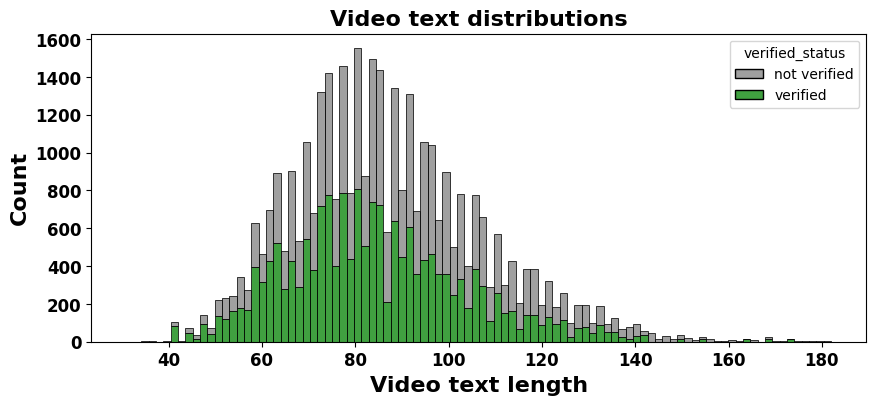

In [445]:
fig = plt.figure(figsize=(10,4))
plt.title("Video text distributions", fontweight = 'bold', fontsize=16)
plt.xlabel("Video text length", fontweight = 'bold', fontsize=16)
plt.ylabel("Count", fontweight = 'bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12);
plt.yticks(fontweight='bold', fontsize=12);
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette={'not verified' : 'gray', 'verified' : 'green'}, hue="verified_status",
              element="bars", legend=True)

$\textbf{Inference : }$ The above is a stacked-bar chart where bars are stacked on top of each other for each video text length bins. So, the bar for not verified videos start on top of verified video bar. Both the distributions are normally distributed about similar means

In [402]:
data_video_text_not_verified = data_upsampled[data_upsampled['verified_status']=='not verified']['text_length']
data_video_text_verified = data_upsampled[data_upsampled['verified_status']=='verified']['text_length']
stats.ttest_ind(a=data_video_text_not_verified, b=data_video_text_verified, equal_var=False)

TtestResult(statistic=22.65480381863026, pvalue=7.847882997937664e-113, df=35660.4763604715)

$\textbf{Inference : }$ The average text length for verified and not verified videos are statistically similar. Hence, to reduce model complexity, this feature will not be used as a predictor variable.

# Finding features that has correlations with the target variable "verified_status" also to exclude multi-collinearity among predictor variables

<Axes: title={'center': 'Heatmap of the upsampled dataset'}>

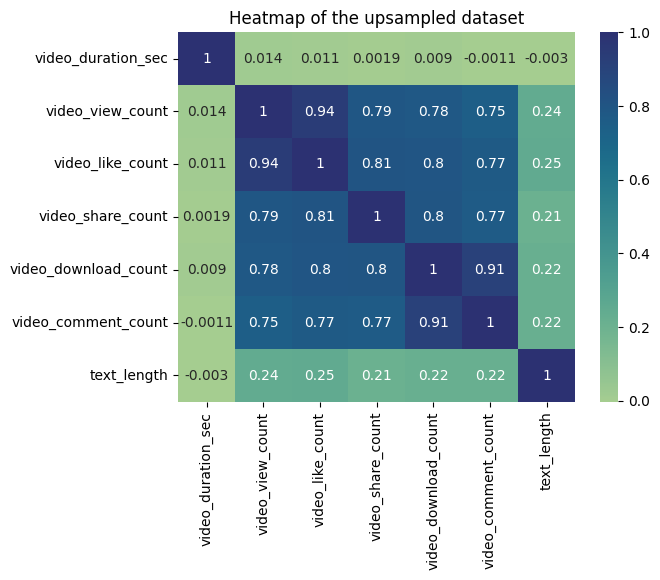

In [403]:
plt.title("Heatmap of the upsampled dataset")
sns.heatmap(data_upsampled[['video_duration_sec', 'video_view_count', "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
            .corr(),annot=True, cmap='crest')

$\textbf{Inference : }$ The feature "video_like_count" has significant correlation with the other features. So, we can exclude in feature engineering process. We should not exclude the "video_view_count" as it will have some important role for the final classification of claim and opinion

# Feature engineering

In [404]:
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
y = data_upsampled['verified_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

$\textbf{Inference : }$ As a part of feature engineering, the feature "#", "video_id" are dropped since they are irrelevant for this study. The feature "video_like_count" is dropped because of its high degree of correlation with other features. The feature "text_length" is dropped as this has almost no statistical variation across the two classes "verified" and "not verified" as proven using A/B test

In [405]:
X_train.dtypes

video_duration_sec      float64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

$\textbf{Inference : }$ "claim_status" and "author_ban_status" need encoding

In [406]:
X_encoder = OneHotEncoder(drop="first", sparse_output=False)
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [407]:
X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis = 1)

$\textbf{Inference : }$ The X_train dataframe has now all columns of numeric type

In [408]:
y_train.head()

33058    verified
20491    verified
25583    verified
18474    verified
27312    verified
Name: verified_status, dtype: object

In [409]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False) # not verified=0
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

In [410]:
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

$\textbf{Inference : }$ The y_train has now all numeric values with 1 being video from "verified" author

# Logistic regression model

In [411]:
clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

$\textbf{Inference : }$ Logistic regression model is built with the chosen features

In [412]:
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

In [413]:
X_test_final.shape

(8942, 8)

$\textbf{Inference : }$ The X_test dataframe has now all columns of numeric type. Total 8942 number of test rows are there

# Regression prediction

In [414]:
y_pred = clf.predict(X_test_final)

In [415]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

In [416]:
y_test.value_counts()

verified_status
verified        4483
not verified    4459
Name: count, dtype: int64

$\textbf{Inference : }$ The regression model prediction is ready to be compared with the y_test. Total 8942 test rows are to be compared with 8942 hold out samples y_test_final. 

# Confusion matrix

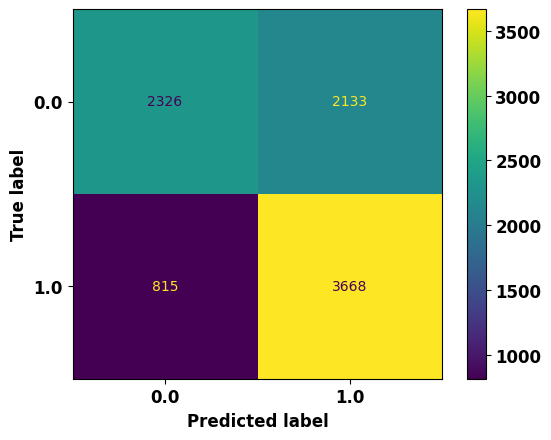

In [417]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=clf.classes_)
fig, ax = plt.subplots()
log_disp.plot(ax=ax, colorbar=False)
im = ax.images[0]
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
plt.setp(ax.get_xticklabels(), fontsize=12, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=12, fontweight='bold')
ax.title.set_size(14)
ax.title.set_weight('bold')
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_size(12)
ax.yaxis.label.set_weight('bold')
#plt.savefig("log_confusion.png", dpi=500)
plt.show()

$\textbf{Inference : }$ The whole test rows are now splitted into 4 categories. 

Upper-left: True negative means that, out of 8942 unseen data, the given regression model can predict 2326 true "not verified" labels out of 4459 actually present in the y_test.

Lower-right: True positive means that, out of 8942 unseen data, the given regression model can predict 3668 true "verified" labels out of 4483 actually present in the y_test.

Upper-right: False positive means that, 2133 number of videos predicted to be coming from "verified" author which are actually from the "not verified" author when compared with the y_test

Lower-left: False negative means that, 815 number of videos predicted to be coming from "not verified" author which are actually from the "verified" author when compared with the y_test

In [418]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



$\textbf{Inference : }$ The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

In [419]:
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.355631e-03
1,video_view_count,-2.037774e-07
2,video_share_count,1.381521e-05
3,video_download_count,-2.656182e-04
4,video_comment_count,7.041774e-04
5,claim_status_opinion,1.726995e+00
6,author_ban_status_banned,-4.518690e-01
7,author_ban_status_under review,-9.732717e-02


$\textbf{Inference : }$ The logistic regression model had not great, but acceptable predictive power: a precision of 63% is less than ideal, but a recall of 82% is very good for "not verified". Overall accuracy is towards the lower end of what would typically be considered acceptable.  Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified.

# Some Machine learning models

In [420]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### From this point, we will not use the upsampled data as it was created for class balancing in logistic regression for "verified_status" feature.

In [421]:
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,downloads_per_view,text_length
0,1,claim,7017666017,59.0,someone shared with me that drone deliveries a...,not verified,under review,343296.0,311333.875,241.0,1.0,0.0,0.056584,0.000000,0.000702,0.000003,97
1,2,claim,4014381136,32.0,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,0.008241,107
2,3,claim,9859838091,31.0,someone shared with me that american industria...,not verified,active,902185.0,311333.875,2858.0,833.0,329.0,0.108282,0.000365,0.003168,0.000923,137
3,4,claim,1866847991,25.0,someone shared with me that the metro of st. p...,not verified,active,437506.0,311333.875,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,0.002821,131
4,5,claim,7105231098,19.0,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,0.622910,0.002706,0.073175,0.009739,128


$\textbf{Inference : }$ The above data will be used for classification of claim_status

In [444]:
data.to_csv('data_v2.csv', index=False)

$\textbf{Inference : }$ The above data is stored for Tableau visualizations

In [422]:
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


$\textbf{Inference : }$ The average video text length is more for claim type videos. We can verify its statistical significance using hypothesis test

In [423]:
data_claim = data[data['claim_status']=='claim']['text_length']
data_opinion = data[data['claim_status']=='opinion']['text_length']
stats.ttest_ind(a=data_claim, b=data_opinion, equal_var=False)

TtestResult(statistic=44.385499339803495, pvalue=0.0, df=19071.879569012017)

$\textbf{Inference : }$ The diiference in text-lengths across claim and opinion class is statistically significant. So, we can use this as a predictor variable

# Feature transformation for machine learning models

In [424]:
X = data.copy()
X = X.drop(columns=['#', 'video_id', 'video_transcription_text'], axis = 1)
X['claim_status'] = X['claim_status'].map({'opinion' : 0, 'claim' : 1}).infer_objects(copy=False)
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

$\textbf{Inference : }$ The entire data is numeric now

In [425]:
y = X['claim_status']
X = X.drop(['claim_status'], axis = 1)

In [426]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

$\textbf{Inference : }$ The entire data is divided into three parts. 60% data X_train, y_train will be used for training various machine learning models. 20% data X_val, y_val will be used to find out which machine learning model performs the best. Then the remaining 20% data X_test, y_test will be used for prediction.

# ML model: Random forest classifier

In [427]:
rf = RandomForestClassifier(random_state=0)
cv_params = {
    'max_depth' : [5, 7, None], #Limiting the depth of the trees helps prevent overfitting
    'max_features' : [0.3, 0.6], #This controls the randomness of the feature selection, helping to create diverse trees and reduce overfitting.
    'max_samples' : [0.7], #The fraction of the training samples to be used for fitting each individual tree.
    'min_samples_leaf' : [1,2], #The minimum number of samples required to be at a leaf node.
    'min_samples_split' : [2,3], #The minimum number of samples required to split an internal node.
    'n_estimators' : [75,100,200] #The number of trees/base learners in the forest.
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')
%time rf_cv.fit(X_train, y_train)

CPU times: total: 6min 30s
Wall time: 6min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [428]:
with open('rf_cv_model.pkl', 'wb') as file:
    pickle.dump(rf_cv, file)

$\textbf{Inference : }$ The Random forest model is trained and the model is saved in a pickle file 'rf_cv_model.pkl'.

# ML model: XGBoost

In [429]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {
    'max_depth' : [4,8,12],
    'min_child_weight' : [3,5],
    'learning_rate' : [0.01, 0.1],
    'n_estimators' : [300,500]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')
%time xgb_cv.fit(X_train, y_train)

CPU times: total: 7min 55s
Wall time: 39.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [430]:
with open('xgb_cv_model.pkl', 'wb') as file:
    pickle.dump(xgb_cv, file)

$\textbf{Inference : }$ TheXGBoost model is trained and the model is saved in a pickle file 'xgb_cv_model.pkl'.

# Read pickel files and find best model

In [431]:
with open('rf_cv_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

with open('xgb_cv_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

In [432]:
print("Best score for Random forest model: " + str(rf_model.best_score_))
print("Best score for XGBoost model: " + str(xgb_model.best_score_))

Best score for Random forest model: 0.9924066515562668
Best score for XGBoost model: 0.9915433917333892


$\textbf{Inference : }$ Both the models perform well, but Random forest model is better as its recall score is little higher than XGBoost model. A final confustion matrix can help choosing the right model using validation data set 

# ML: Random forest against validation data

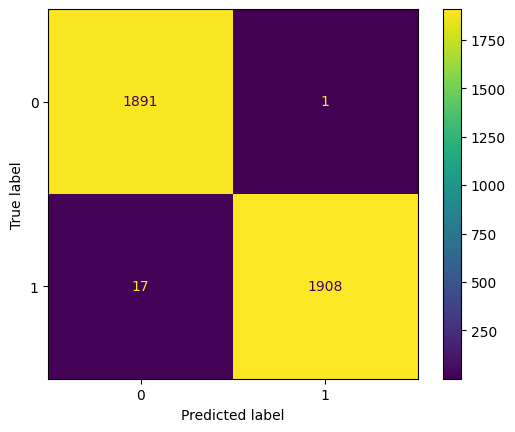

In [433]:
y_pred_rf = rf_model.best_estimator_.predict(X_val)
cm_rf = confusion_matrix(y_val, y_pred_rf, labels=None)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=None).plot()

In [434]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



$\textbf{Inference : }$ Random forest model perfroms well on validation data with total 18 mis-classifications

# ML: XGBoost against validation data

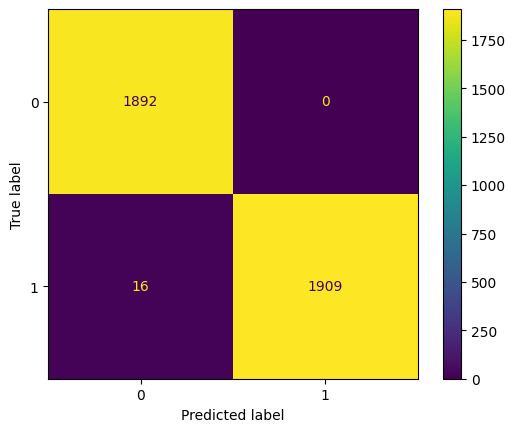

In [435]:
y_pred_xgb = xgb_model.best_estimator_.predict(X_val)
cm_xgb = confusion_matrix(y_val, y_pred_xgb, labels=None)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=None).plot()

In [436]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



$\textbf{Inference : }$ XGBoost model perfroms well on validation data with total 16 mis-classifications

# Best model

$\textbf{Inference : }$ XGBoost is the best model as it has less number of false negative.

# Final prediction

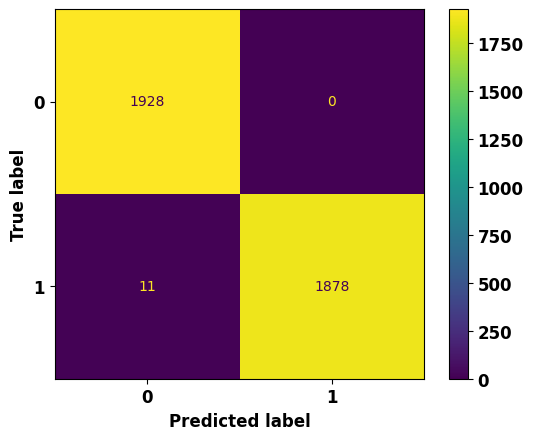

In [443]:
y_pred = xgb_model.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

fig, ax = plt.subplots()
disp.plot(ax=ax, colorbar=False)
im = ax.images[0]
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
plt.setp(ax.get_xticklabels(), fontsize=12, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=12, fontweight='bold')
ax.title.set_size(14)
ax.title.set_weight('bold')
ax.xaxis.label.set_size(12)
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_size(12)
ax.yaxis.label.set_weight('bold')
#plt.savefig("final_cm.png", dpi=500)
plt.show()

$\textbf{Inference : }$ The best model XGBoost performs well on testing unseen data as well with only 11 mis-labels.

# Importances

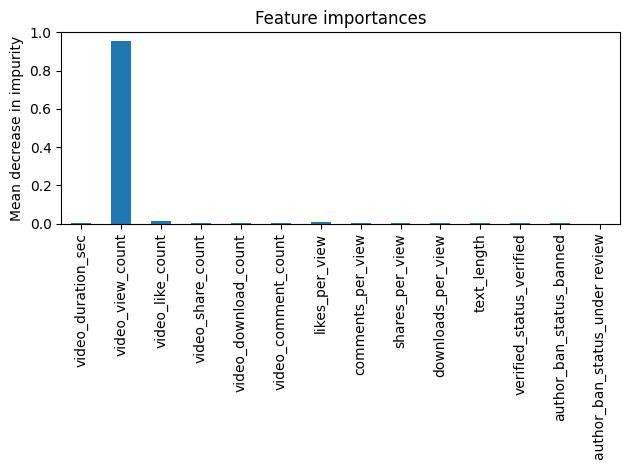

In [441]:
importances = xgb_model.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

$\textbf{Inference : }$ The most important feature for claim-opinion classification is "video_view_count". This was also the case when the EDA was performed.